#**Data & Transportation Final Project**
##Tourists Recommendation System
###*Computer Science - Ruppin Academic Center*

####Shai Shmuel, Rony Marshall, Uriel Bender

####LSTM NoteBook

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#####Upload The CSV File

In [ ]:
uploaded = files.upload()

Saving activitiesWithAccomodation2.csv to activitiesWithAccomodation2.csv


In [ ]:
activities = pd.read_csv(io.BytesIO(uploaded['activities.csv']))
activities.head(2)

,Unnamed: 0,Record ID,Activity ID,Travel Date,Activity Name,visit purpose category,religious affiliation category,first visit,country of origin,length of visit,arrival season,first activity of the day,last activity of the day,activity during the day,arrival date,total number of days,number of activity days,number of activities throughout the trip,number of activities per day for analysis,activity weekday,activity month,year,total minutes of activity,Arriving Time hour,tourist final aria,organized day trip,precentage organized transportation excluding walking,precentage taxi excluding walking,precentage private vehicle excluding walking,precentage public transportation excluding walking,day category,Jerusalem visiting category,Morning accommodation\nlocation,Evening accommodation\nlocation,activity purpose,Tourist in organized group
0,23,17545,57602,12/2/2015,"פארק גשר הצבים, נחל אלכסנדר",family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,3,Wednesday,12,2015,87,11,עמק חפר,No,0%,0%,100%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0
1,45,17545,68933,12/7/2015,פארק עם הכלב,family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,2,Monday,12,2015,25,13,בורגתה,No,0%,0%,0%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0


In [ ]:
activities=activities[['Record ID','Activity ID','Travel Date','Activity Name','visit purpose category','religious affiliation category','first visit','country of origin','length of visit',
                       'arrival season', 'first activity of the day','last activity of the day', 'activity during the day', 'arrival date','total number of days', 'number of activity days',
                       'number of activities throughout the trip','number of activities per day for analysis', 'activity weekday','activity month','year','total minutes of activity','Arriving Time hour',
                       'tourist final aria','organized day trip','precentage organized transportation excluding walking','precentage taxi excluding walking','precentage private vehicle excluding walking',
                       'precentage public transportation excluding walking','day category','Jerusalem visiting category','Morning accommodation\nlocation']]

In [ ]:
activities=activities.rename(columns={'Record ID':'tourist_id','Activity ID':'act_id','Travel Date':'act_date','Activity Name':'act_name','visit purpose category':'visit_purpose','religious affiliation category':'religion','first visit':'is_first_visit',
                                      'country of origin':'origin','length of visit':'is_long_visit','arrival season':'arrival_season','first activity of the day':'is_first_act_of_day','last activity of the day':'is_last_act_of_day',
                                      'activity during the day':'is_act_during_day','arrival date':'arrival_date','total number of days':'total_visit_days','number of activity days':'total_act_days','number of activities throughout the trip':'total_act',
                                      'number of activities per day for analysis':'act_per_day','activity weekday':'act_weekday','activity month':'act_month','year':'act_year','total minutes of activity':'act_duration','Arriving Time hour':'act_start_hour',
                                      'tourist final aria':'act_place','organized day trip':'is_organized_day_trip','precentage organized transportation excluding walking':'organized_transportation_precent',
                                      'precentage taxi excluding walking':'taxi_precent','precentage private vehicle excluding walking':'private_vehicle_precent','precentage public transportation excluding walking':'public_tranport_precent',
                                      'day category':'day_category','Jerusalem visiting category':'jerusalem_visiting_category','Morning accommodation\nlocation':'accomodation_place'})

In [ ]:
activities.shape

(31644, 32)

In [ ]:
activities.act_start_hour = activities.act_start_hour.mod(24)
print(activities['act_start_hour'].max())
print(activities['act_start_hour'].min())

23
0


In [ ]:
activities.loc[activities['visit_purpose']=='family & friends','visit_purpose']='Family&Friends'
activities.loc[activities['visit_purpose']=='traveling and religion','visit_purpose']='Travel&Religion'
activities.loc[activities['religion']=='Jewish - Religious','religion']='JewishReligious'
activities.loc[activities['religion']=='No affiliation + Other','religion']='Other'
activities.loc[activities['is_first_visit']=='no','is_first_visit']=0
activities.loc[activities['is_first_visit']=='yes','is_first_visit']=1
activities.loc[activities['origin']=='North America','origin']='North_America'
activities.loc[activities['origin']=='East Asia','origin']='East_Asia'
activities.loc[activities['origin']=='South and Central America','origin']='South_Central_America'
activities.loc[activities['is_long_visit']=='long visit','is_long_visit']=1
activities.loc[activities['is_long_visit']=='short visit','is_long_visit']=0
activities.loc[activities['arrival_season']=="Tishrei 'Holidays",'arrival_season']='Tishrei_Holidays'
activities.loc[activities['is_organized_day_trip']=='No','is_organized_day_trip']=0
activities.loc[activities['is_organized_day_trip']=='-1','is_organized_day_trip']=0
activities.loc[activities['is_organized_day_trip']=='Yes','is_organized_day_trip']=1
activities.loc[activities['day_category']=='Normal day','day_category']='Normal_Day'
activities.loc[activities['day_category']=='First day','day_category']='First_Day'
activities.loc[activities['day_category']=='Last day','day_category']='Last_Day'
activities.loc[activities['jerusalem_visiting_category']=='0','jerusalem_visiting_category']='0'
activities.loc[activities['jerusalem_visiting_category']=='One day','jerusalem_visiting_category']='1'
activities.loc[activities['jerusalem_visiting_category']=='More than one day','jerusalem_visiting_category']='More_than_one'

In [ ]:
activities.nunique()

tourist_id                           2218
act_id                              31644
act_date                              730
act_name                             3752
visit_purpose                           3
religion                                4
is_first_visit                          2
origin                                  7
is_long_visit                           2
arrival_season                          5
is_first_act_of_day                     2
is_last_act_of_day                      2
is_act_during_day                       2
arrival_date                          496
total_visit_days                       17
total_act_days                         16
total_act                             102
act_per_day                            23
act_weekday                             7
act_month                              12
act_year                                3
act_duration                          486
act_start_hour                         24
act_place                         

In [ ]:
df=pd.crosstab(activities.act_name,columns="count")
df.sort_values("count",ascending=False).head(50)

col_0,count
act_name,
חוף הים,3256
הרובע היהודי,1575
תצפית,1526
פאב,1128
הרובע הנוצרי,1096
בית כנסת,1053
טיול רגלי,938
כנסיית הקבר,802
הכותל המערבי,791


In [ ]:
df=pd.crosstab(activities.act_place,columns="count")
df.sort_values("count",ascending=True).tail(15)

col_0,count
act_place,
מצפה רמון,165
חופי ים סוף,173
צפת,222
נתניה,247
קיסריה,287
נצרת והסביבה,291
עכו,299
אילת,342
בית לחם,353


In [ ]:
df=pd.crosstab(activities.act_place,columns="count")
df=df.sort_values("count",ascending=True).tail(15)

In [ ]:
df.index

Index(['מצפה רמון', 'חופי ים סוף', 'צפת', 'נתניה', 'קיסריה', 'נצרת והסביבה',
       'עכו', 'אילת', 'בית לחם', 'חיפה והסביבה', 'הכינרת והסביבה',
       'ים המלח והסביבה', 'חופי הים התיכון', 'תל אביב יפו', 'ירושלים'],
      dtype='object', name='act_place')

In [ ]:
ls=[]
for i in df.index:
  #ls.append(i.strip())
  ls.append(i)
ls

['מצפה רמון',
 'חופי ים סוף',
 'צפת',
 'נתניה',
 'קיסריה',
 'נצרת והסביבה',
 'עכו',
 'אילת',
 'בית לחם',
 'חיפה והסביבה',
 'הכינרת והסביבה',
 'ים המלח והסביבה',
 'חופי הים התיכון',
 'תל אביב יפו',
 'ירושלים']

In [ ]:
activities=activities.loc[activities['act_place'].isin(ls)]

In [ ]:
#activities.loc[activities['act_place']=='מצפה רמון','act_place']='Mitzpe_Ramon'
#activities.loc[activities['act_place']=='חופי ים סוף','act_place']='Yam_Suf_beach'
#activities.loc[activities['act_place']=='צפת','act_place']='Zfat'
#activities.loc[activities['act_place']=='נתניה','act_place']='Netanya'
#activities.loc[activities['act_place']=='בית לחם','act_place']='Beit_Lehem'
#activities.loc[activities['act_place']=='קיסריה ','act_place']='Caesarea'
#activities.loc[activities['act_place']=='עכו','act_place']='Akko'
#activities.loc[activities['act_place']=='נצרת והסביבה ','act_place']='Nazeret_area'
#activities.loc[activities['act_place']=='אילת','act_place']='Eilat'
#activities.loc[activities['act_place']=='חיפה והסביבה','act_place']='Haifa_area'
#activities.loc[activities['act_place']=='הכינרת והסביבה','act_place']='Kineret_area'
#activities.loc[activities['act_place']=='ים המלח והסביבה','act_place']='Dead_sea_area'
#activities.loc[activities['act_place']=='חופי הים התיכון ','act_place']='Mediterranean_beach'
#activities.loc[activities['act_place']=='תל אביב יפו','act_place']='Tel_Aviv_Jaffa'
#activities.loc[activities['act_place']=='ירושלים','act_place']='Jerusalem'

In [ ]:
activities.loc[activities['act_place']=='מצפה רמון','act_place']=0
activities.loc[activities['act_place']=='חופי ים סוף','act_place']=1
activities.loc[activities['act_place']=='צפת','act_place']=2
activities.loc[activities['act_place']=='נתניה','act_place']=3
activities.loc[activities['act_place']=='בית לחם','act_place']=4
activities.loc[activities['act_place']=='קיסריה','act_place']=5
activities.loc[activities['act_place']=='עכו','act_place']=6
activities.loc[activities['act_place']=='נצרת והסביבה','act_place']=7
activities.loc[activities['act_place']=='אילת','act_place']=8
activities.loc[activities['act_place']=='חיפה והסביבה','act_place']=9
activities.loc[activities['act_place']=='הכינרת והסביבה','act_place']=10
activities.loc[activities['act_place']=='ים המלח והסביבה','act_place']=11
activities.loc[activities['act_place']=='חופי הים התיכון','act_place']=12
activities.loc[activities['act_place']=='תל אביב יפו','act_place']=13
activities.loc[activities['act_place']=='ירושלים','act_place']=14

In [ ]:
activities.shape

(27416, 32)

In [ ]:
df=activities[['act_name','act_duration']]
df.sort_values(by='act_duration').head(3000)

,act_name,act_duration
18123,ישיבה,0
31404,פאב,0
12290,מועדון,0
17956,ישיבה,0
30406,תצפית,0
...,...,...
7749,הרובע הארמני,5
5602,העיר העתיקה,5
20743,מגדל דוד,5
16157,העיר העתיקה,5


In [ ]:
activities=activities.loc[(activities['act_duration'] > 10) & (activities['act_duration']<500)]
activities.shape

(21287, 32)

In [ ]:
activities.act_place.nunique()

15

In [ ]:
df=pd.crosstab(activities.religion,columns="count")
df.sort_values("count",ascending=True)

col_0,count
religion,
JewishReligious,3080
Jewish,4359
Other,5156
Christian,8692


In [ ]:
df=pd.crosstab(activities.origin,columns="count")
df.sort_values("count",ascending=True)

col_0,count
origin,
Other,3
Africa,167
East_Asia,243
Oceania,429
South_Central_America,495
North_America,6451
Europe,13499


In [ ]:
#dropped act_place from dummies for NN
activities=pd.get_dummies(activities, 
                          columns=["visit_purpose", "religion", "origin", "arrival_season","act_weekday","act_month","act_year","day_category","jerusalem_visiting_category"],
                          prefix=["visit_purpose", "religion", "origin", "arrival_season","act_weekday","act_month","act_year","day_category","jerusalem_visiting_category"])
activities.head()

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one
3,17556,59463,12/2/2015,חוף הים,0,1,0,0,1,12/2/2015,5,5,28,4,54,13,12,0,0%,57%,0%,0%,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
4,92435,846034,4/26/2017,אודיטוריום,0,1,0,0,1,4/23/2017,8,7,44,6,103,13,14,0,0%,0%,0%,100%,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
5,20726,266821,4/28/2016,אולם אירועים,0,1,0,0,1,4/27/2016,9,8,37,6,127,19,14,0,0%,100%,0%,0%,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
6,153888,1554936,10/8/2017,אולפנה?,0,1,0,0,1,10/8/2017,8,7,24,9,63,20,14,0,0%,100%,0%,0%,NaN,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
7,24131,504374,11/3/2016,אוניברסיטה,1,1,0,0,1,10/26/2016,9,8,32,5,85,16,14,0,100%,0%,0%,0%,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [ ]:
#activities.corr()

In [ ]:
df=activities[['act_name','act_duration']]
df.sort_values(by='act_duration',ascending=True).head(2000)

,act_name,act_duration
26307,הרובע הארמני,11
13556,הרובע הנוצרי,11
10875,הרובע היהודי,11
14731,תצפית,11
14735,קבר רבי מאיר בעל הנס,11
...,...,...
16638,טיול רגלי,15
28959,שער האשפות,15
29341,טיול רגלי בעיר,15
2754,תצפית,15


In [ ]:
len(activities.accomodation_place.unique())

240

In [ ]:
activities = activities.loc[activities['total_visit_days'] >= 4]
activities = activities.loc[activities['total_act'] >= 5]

activities.shape

(21002, 70)

# Outliers check and removal

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
#fig = go.Figure()
#fig.add_traces(go.Heatmap(
#    z=activities.corr(), 
#    x= activities.columns, 
#    y= activities.columns,
#))
#fig.update_layout({
#    'title':"activities Dataframe Correlation Heatmap",
#    'height':1500,
#    'width':1500
#})

In [ ]:
# corr_df = activities.corr()

# cols = corr_df.columns.to_list()
# for i in range(len(cols)):
#   print(cols[i], ': ', end=' ')
#   for j in range(len(cols)):
#     if abs(corr_df.iloc[i,j]) >= abs(0.2) and cols[i] is not cols[j] :
#       print(cols[j],round(corr_df.iloc[i,j],2), end=', ')
#   print()

In [ ]:
#check for outliers 
fig = go.Figure()
fig.add_trace(go.Box(name='total_visit_days', y = activities.total_visit_days , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(name='total_act_days', y = activities.total_act_days , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='total_act', y = activities.total_act , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(name='act_per_day', y = activities.act_per_day , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='act_duration', y = activities.act_duration , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [ ]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

In [ ]:
act_duration_botrange, act_duration_toprange, act_duration_outliers = get_outliers(activities, activities.act_duration)
print("act_duration col top range = ", act_duration_toprange)
print("act_duration col bottom range = ",act_duration_botrange)

print(act_duration_outliers['act_duration'])

act_duration col top range =  211.0
act_duration col bottom range =  -85.0
21       221
123      279
154      409
198      284
200      465
        ... 
31370    287
31506    250
31509    287
31517    240
31518    242
Name: act_duration, Length: 1127, dtype: int64


In [ ]:
#total_visit_days, total_act_days ,total_act,act_per_day, act_duration
total_visit_days_botrange, total_visit_days_toprange, total_visit_days_outliers = get_outliers(activities, activities.total_visit_days)
total_act_days_botrange, total_act_days_toprange, total_act_days_outliers = get_outliers(activities, activities.total_act_days)
total_act_botrange, total_act_toprange, total_act_outliers = get_outliers(activities, activities.total_act)
act_per_day_botrange, act_per_day_toprange, act_per_day_outliers = get_outliers(activities, activities.act_per_day)


print("total_visit_days col top range = ", total_visit_days_toprange)
print("total_visit_days col bottom range = ",total_visit_days_botrange)

print("total_act_days col top range = ", total_act_days_toprange)
print("total_act_days col bottom range = ",total_act_days_botrange)

print("total_act col top range = ", total_act_toprange)
print("total_act col bottom range = ",total_act_botrange)

print("act_per_day col top range = ", act_per_day_toprange)
print("act_per_day col bottom range = ",act_per_day_botrange)

total_visit_days col top range =  19.5
total_visit_days col bottom range =  -0.5
total_act_days col top range =  17.0
total_act_days col bottom range =  1.0
total_act col top range =  102.5
total_act col bottom range =  -13.5
act_per_day col top range =  16.5
act_per_day col bottom range =  -3.5


In [ ]:
total_visit_days_index_list = [i for i in activities.index if i not in total_visit_days_outliers.index]
total_act_days_index_list = [i for i in activities.index if i not in total_act_days_outliers.index]
total_act_index_list = [i for i in activities.index if i not in total_act_outliers.index]
act_per_day_index_list = [i for i in activities.index if i not in act_per_day_outliers.index]


no_outliers_df = activities.loc[total_visit_days_index_list]
no_outliers_df = activities.loc[total_act_days_index_list]
no_outliers_df = activities.loc[total_act_index_list]
no_outliers_df = activities.loc[act_per_day_index_list]


no_outliers_df.reset_index(inplace=True, drop=True)
activities=no_outliers_df

In [ ]:
#standard normalization for numeric columns

mean=activities.total_visit_days.mean()
activities.total_visit_days-=mean
std=activities.total_visit_days.std()
activities.total_visit_days/=std

mean=activities.total_act_days.mean()
activities.total_act_days-=mean
std=activities.total_act_days.std()
activities.total_act_days/=std

mean=activities.total_act.mean()
activities.total_act-=mean
std=activities.total_act.std()
activities.total_act/=std

mean=activities.act_per_day.mean()
activities.act_per_day-=mean
std=activities.act_per_day.std()
activities.act_per_day/=std

mean=activities.act_duration.mean()
activities.act_duration-=mean
std=activities.act_duration.std()
activities.act_duration/=std

- above 90% of the places are in the tail 100 of the data according to act_place column
- jerusalem is more than 30% of the records

In [ ]:
activities.shape

(20826, 70)

In [ ]:
activities.columns

Index(['tourist_id', 'act_id', 'act_date', 'act_name', 'is_first_visit',
       'is_long_visit', 'is_first_act_of_day', 'is_last_act_of_day',
       'is_act_during_day', 'arrival_date', 'total_visit_days',
       'total_act_days', 'total_act', 'act_per_day', 'act_duration',
       'act_start_hour', 'act_place', 'is_organized_day_trip',
       'organized_transportation_precent', 'taxi_precent',
       'private_vehicle_precent', 'public_tranport_precent',
       'accomodation_place', 'visit_purpose_Family&Friends',
       'visit_purpose_Travel&Religion', 'visit_purpose_business',
       'religion_Christian', 'religion_Jewish', 'religion_JewishReligious',
       'religion_Other', 'origin_Africa', 'origin_East_Asia', 'origin_Europe',
       'origin_North_America', 'origin_Oceania', 'origin_Other',
       'origin_South_Central_America', 'arrival_season_Christmas',
       'arrival_season_Spring', 'arrival_season_Summer',
       'arrival_season_Tishrei_Holidays', 'arrival_season_Winter',
    

In [ ]:
# convert string % to float values
activities['organized_transportation_precent'] = activities['organized_transportation_precent'].str.rstrip('%').astype('float') / 100.0
activities['taxi_precent'] = activities['taxi_precent'].str.rstrip('%').astype('float') / 100.0
activities['private_vehicle_precent'] = activities['private_vehicle_precent'].str.rstrip('%').astype('float') / 100.0
activities['public_tranport_precent'] = activities['public_tranport_precent'].str.rstrip('%').astype('float') / 100.0

In [ ]:
#the column "is_1st_act_of_the_day" not show correct values because we delete on the data preparation some records, and that is why we put 1 at the 1st act for each tourist_id and put 0 in the column "is_act_during_the_day"

activities["act_place_before"] = activities.groupby(['tourist_id'])['act_place'].shift(1)
activities["act_place_before"]=np.where(activities['act_place_before'].isnull(),16,activities.act_place_before)
activities["is_first_act_of_day"]=np.where(activities['act_place_before']==16 ,1,0)
activities["is_act_during_day"]=np.where(activities['is_first_act_of_day']==1 ,0,activities.is_act_during_day)

activities["act_place_before2"] = activities.groupby(['tourist_id'])['act_place'].shift(2)
activities["act_place_before2"]=np.where(activities['act_place_before2'].isnull(),16,activities.act_place_before2)

In [ ]:
activities.head(30)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_place_before,act_place_before2
0,17556,59463,12/2/2015,חוף הים,0,1,1,0,0,12/2/2015,-1.454847,-1.247900,-0.854205,-0.837902,-0.302516,13,12,0,0.00,0.57,0.00,0.00,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16
1,92435,846034,4/26/2017,אודיטוריום,0,1,1,0,0,4/23/2017,-0.492598,-0.603250,-0.063430,-0.204238,0.403026,13,14,0,0.00,0.00,0.00,1.00,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16
2,20726,266821,4/28/2016,אולם אירועים,0,1,1,0,0,4/27/2016,-0.171849,-0.280924,-0.409394,-0.204238,0.748598,19,14,0,0.00,1.00,0.00,0.00,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,16,16
3,153888,1554936,10/8/2017,אולפנה?,0,1,1,0,0,10/8/2017,-0.492598,-0.603250,-1.051899,0.746257,-0.172927,20,14,0,0.00,1.00,0.00,0.00,NaN,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,16,16
4,24131,504374,11/3/2016,אוניברסיטה,1,1,1,0,0,10/26/2016,-0.171849,-0.280924,-0.656511,-0.521070,0.143847,16,14,0,1.00,0.00,0.00,0.00,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,16,16
5,63678,694592,3/2/2017,אוניברסיטה,1,1,1,0,0,2/19/2017,1.431899,1.653028,3.841022,1.379920,-0.000141,11,14,0,0.00,1.00,0.00,0.00,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16
6,64349,670862,2/23/2017,אזור מסחרי,0,1,1,0,0,2/21/2017,-1.454847,-1.570226,-1.051899,0.112593,-0.734481,14,14,0,0.04,0.00,0.00,0.96,תל אביב יפו,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,16,16
7,17556,59437,12/5/2015,תצפית,0,1,0,0,1,12/2/2015,-1.454847,-1.247900,-0.854205,0.429425,-0.878469,10,11,0,0.00,0.06,0.89,0.00,ירושלים,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,12,16
8,17556,429325,12/5/2015,מצדה,0,1,0,0,1,12/2/2015,-1.454847,-1.247900,-0.854205,0.429425,0.475020,11,11,0,0.00,0.06,0.89,0.00,ירושלים,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,11,12
9,17557,59534,12/2/2015,"ת""א",1,1,1,0,0,12/2/2015,-1.454847,-1.247900,-0.162277,0.429425,-0.633689,19,13,0,0.00,0.00,0.00,1.00,NaN,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16


In [ ]:
activities[['act_start_hour_morning','act_start_hour_afternoon','act_start_hour_evening','act_start_hour_night']] = np.NaN

activities['act_start_hour_morning'] = np.where((activities['act_start_hour'] >= 5) & (activities['act_start_hour'] <= 12) , 1, 0)
activities['act_start_hour_afternoon'] = np.where((activities['act_start_hour'] > 12) & (activities['act_start_hour'] <= 18) , 1, 0)
activities['act_start_hour_evening'] = np.where((activities['act_start_hour'] > 18) & (activities['act_start_hour'] <= 24) , 1, 0)
activities['act_start_hour_night'] = np.where((activities['act_start_hour'] >= 0) & (activities['act_start_hour'] < 5) , 1, 0)


In [ ]:
activities.head()

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_place_before,act_place_before2,act_start_hour_morning,act_start_hour_afternoon,act_start_hour_evening,act_start_hour_night
0,17556,59463,12/2/2015,חוף הים,0,1,1,0,0,12/2/2015,-1.454847,-1.247900,-0.854205,-0.837902,-0.302516,13,12,0,0.0,0.57,0.0,0.0,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16,0,1,0,0
1,92435,846034,4/26/2017,אודיטוריום,0,1,1,0,0,4/23/2017,-0.492598,-0.603250,-0.063430,-0.204238,0.403026,13,14,0,0.0,0.00,0.0,1.0,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16,0,1,0,0
2,20726,266821,4/28/2016,אולם אירועים,0,1,1,0,0,4/27/2016,-0.171849,-0.280924,-0.409394,-0.204238,0.748598,19,14,0,0.0,1.00,0.0,0.0,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,16,16,0,0,1,0
3,153888,1554936,10/8/2017,אולפנה?,0,1,1,0,0,10/8/2017,-0.492598,-0.603250,-1.051899,0.746257,-0.172927,20,14,0,0.0,1.00,0.0,0.0,NaN,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,16,16,0,0,1,0
4,24131,504374,11/3/2016,אוניברסיטה,1,1,1,0,0,10/26/2016,-0.171849,-0.280924,-0.656511,-0.521070,0.143847,16,14,0,1.0,0.00,0.0,0.0,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,16,16,0,1,0,0


# Adding columns to indicate if the tourist had been in every place before

In [ ]:
tourists_ids=activities.tourist_id.unique()
activities_ids=activities.act_id.unique()

#Create a dictionary to save the activities by ID 
ls={} 
for i in range(len(tourists_ids)):                                                          
  tmp=activities[['act_duration','act_start_hour','act_place_before','act_place_before2','act_place']].loc[activities["tourist_id"]==tourists_ids[i]].head(20)
  if len(tmp)>=5:
    ls[str(tourists_ids[i])]=tmp.to_numpy()

In [ ]:
ls['17556']

array([[-0.3025163268911033, 13, 16, 16, 12],
       [-0.8784692487362976, 10, 12, 16, 11],
       [0.475020117599909, 11, 11, 12, 11],
       [-0.3745104421217526, 12, 11, 11, 14],
       [-0.2737186807988436, 13, 14, 11, 14],
       [-0.31691514993723313, 14, 14, 14, 14]], dtype=object)

In [ ]:
g = activities.groupby("tourist_id")
for c in activities["act_place"].unique():
    activities["was_in_{}".format(c)] = g["act_place"].transform(
        lambda x: (x == c)
        .shift()
        .replace(False, np.nan)
        .ffill()
        .fillna(0)
        .astype(int)
    )

print(activities)


       tourist_id   act_id    act_date  ... was_in_8 was_in_0 was_in_3
0           17556    59463   12/2/2015  ...        0        0        0
1           92435   846034   4/26/2017  ...        0        0        0
2           20726   266821   4/28/2016  ...        0        0        0
3          153888  1554936   10/8/2017  ...        0        0        0
4           24131   504374   11/3/2016  ...        0        0        0
...           ...      ...         ...  ...      ...      ...      ...
20821      193295  1622756  11/24/2017  ...        0        0        0
20822      173769  1608111   11/2/2017  ...        1        0        0
20823       22423   403852   8/12/2016  ...        0        0        0
20824       17689    73505  12/16/2015  ...        0        0        0
20825       22232   390355    8/1/2016  ...        0        0        0

[20826 rows x 91 columns]


In [ ]:
activities.head(5)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,...,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_0,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_place_before,act_place_before2,act_start_hour_morning,act_start_hour_afternoon,act_start_hour_evening,act_start_hour_night,was_in_12,was_in_14,was_in_11,was_in_13,was_in_7,was_in_9,was_in_10,was_in_6,was_in_2,was_in_4,was_in_5,was_in_1,was_in_8,was_in_0,was_in_3
0,17556,59463,12/2/2015,חוף הים,0,1,1,0,0,12/2/2015,-1.454847,-1.247900,-0.854205,-0.837902,-0.302516,13,12,0,0.0,0.57,0.0,0.0,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,16,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,92435,846034,4/26/2017,אודיטוריום,0,1,1,0,0,4/23/2017,-0.492598,-0.603250,-0.063430,-0.204238,0.403026,13,14,0,0.0,0.00,0.0,1.0,ירושלים,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,16,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20726,266821,4/28/2016,אולם אירועים,0,1,1,0,0,4/27/2016,-0.171849,-0.280924,-0.409394,-0.204238,0.748598,19,14,0,0.0,1.00,0.0,0.0,ירושלים,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,16,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,153888,1554936,10/8/2017,אולפנה?,0,1,1,0,0,10/8/2017,-0.492598,-0.603250,-1.051899,0.746257,-0.172927,20,14,0,0.0,1.00,0.0,0.0,NaN,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,16,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24131,504374,11/3/2016,אוניברסיטה,1,1,1,0,0,10/26/2016,-0.171849,-0.280924,-0.656511,-0.521070,0.143847,16,14,0,1.0,0.00,0.0,0.0,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,16,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####The LSTM model will learn a function that maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple examples from which the LSTM can learn.

In [ ]:
def split_sequence(sequence, n_steps):
	_X, _y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		_X.append(seq_x)
		_y.append(seq_y)
	return np.array(_X), np.array(_y)

In [ ]:
y=[]
X=[]

arr=np.array(list(ls.values()))

for k in range(len(arr)):
# define input sequence
  raw_seq =arr[k]
# choose a number of time steps
  n_steps = 3
# split into samples
  Xtmp, ytmp = split_sequence(raw_seq, n_steps)
# summarize the data
  for i in range(len(Xtmp)):
    X.append(Xtmp[i])
    y.append(ytmp[i])

tmp=[]
for i in y:
  for j in range(len(i)):
    if j==4:
      tmp.append(i[j])
y=tmp

# for i in range(len(X)):
#   print(X[i], y[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
#ls holds dictionary of 5 first places the tourist visited

# for i in range(len(arr)):
#   y.append(arr[i][4:5])
#   X.append(arr[i][:4])

y=np.array(y).astype('float32')
X=np.array(X).astype('float32')
print(X.shape)

#[samples,timesteps,features]
n_features = 5
# X=X.reshape(X.shape[0],X.shape[1],n_features)
# print(X.shape)

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)
partial_train_data, val_data, partial_train_targets, val_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=123*k)

(13684, 3, 5)


In [ ]:
print(y.shape)
print(X.shape)

(13684,)
(13684, 3, 5)


In [ ]:
import keras 
from keras.layers import LSTM


In [ ]:
from tensorflow.keras.utils import to_categorical
train_targets = to_categorical(train_targets)
test_targets=to_categorical(test_targets)
partial_train_targets = to_categorical(partial_train_targets)
val_targets=to_categorical(val_targets)


In [ ]:
print('train_targets: ',train_targets.shape)
print('test_targets: ',test_targets.shape)
print('partial_train_targets: ',partial_train_targets.shape)
print('val_targets: ',val_targets.shape)

train_targets:  (10947, 15)
test_targets:  (2737, 15)
partial_train_targets:  (8757, 15)
val_targets:  (2190, 15)


In [ ]:
# define model
model = keras.Sequential()
model.add(LSTM(256, activation='sigmoid',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(keras.layers.Dropout(0.1))
model.add(LSTM(128,activation='sigmoid'))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(15,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

# fit model

history=model.fit(partial_train_data,
                  partial_train_targets,
                  epochs=140,
                  batch_size=100,
                  validation_data=(val_data,val_targets))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 256)            268288    
_________________________________________________________________
dropout (Dropout)            (None, 3, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 15)                1935      
Total params: 467,343
Trainable params: 467,343
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/140
88/88 [==============================] - 25s 43ms/step - loss: 2.0848 - acc: 0.3316 - val_loss: 1.8175 - val_acc: 0.3982
Epoch 2/140
88/88 [==============================] - 3s 30ms/step - loss: 1.7692 - acc: 0.3981 - val_loss: 1.7

In [ ]:
val_loss, val_acc= model.evaluate(val_data,val_targets,verbose=0)

In [ ]:
print("validation acc: ", val_acc)
print("validation loss: ",val_loss)

validation acc:  0.6132420301437378
validation loss:  1.2458840608596802


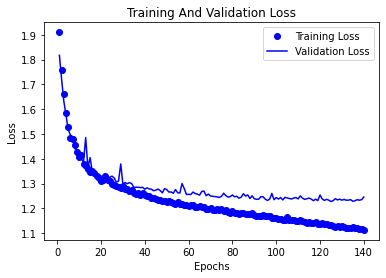

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

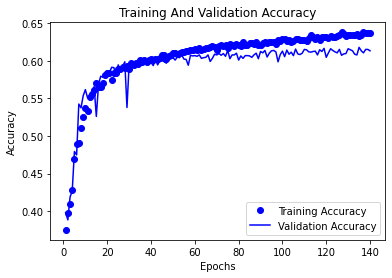

In [ ]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_targets)

86/86 [==============================] - 1s 6ms/step - loss: 1.2466 - acc: 0.6149


In [ ]:
print("test acc: ",test_acc)
print("test loss: ",test_loss)

test acc:  0.6149068474769592
test loss:  1.2465944290161133


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
def to_classes(arr):
  rows, cols = (arr.shape[0],arr.shape[1]) 
  result=np.zeros(arr.shape[0],)
  max=0
  index=0
  for i in range(rows):
    for j in range(cols):
      if arr[i][j]>max:
           max=arr[i][j]
           index=j
    result[i]=index
    max=0 
  return result

In [ ]:
test_pred= model.predict(test_data,verbose=0)
test_pred_classes=to_classes(test_pred)
test_targets_classes=to_classes(test_targets)
#print(val_pred_classes.shape,val_targets_classes.shape)
#print(val_pred_classes,val_targets_classes)
#print(confusion_matrix(test_targets_classes,test_pred_classes,normalize='all'))
report = classification_report(test_targets_classes, test_pred_classes)
print(report)

              precision    recall  f1-score   support

         0.0       0.25      0.05      0.08        21
         1.0       0.17      0.12      0.14        16
         2.0       0.27      0.17      0.21        24
         3.0       0.61      0.48      0.54        29
         4.0       0.36      0.09      0.15        43
         5.0       0.00      0.00      0.00        25
         6.0       0.16      0.23      0.19        35
         7.0       0.00      0.00      0.00        34
         8.0       0.52      0.56      0.54        48
         9.0       0.38      0.43      0.40        70
        10.0       0.53      0.56      0.55       111
        11.0       0.48      0.52      0.50       225
        12.0       0.25      0.05      0.08       416
        13.0       0.49      0.84      0.62       581
        14.0       0.87      0.86      0.86      1059

    accuracy                           0.61      2737
   macro avg       0.36      0.33      0.32      2737
weighted avg       0.58   